In [1]:
import pandas as pd
import numpy as np

In [2]:
# import pandas as pd
# import numpy as np
# np.random.seed(37) 

import types
from botocore.client import Config
import ibm_boto3

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier, plot_importance
import xgboost as xgb

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score,\
                            f1_score, roc_auc_score, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras import backend as K


import tensorflow as tf
import itertools

from time import time

In [35]:
df = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_1.csv', index_col=False)
df2 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_2.csv', index_col=False)
df3 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_3.csv', index_col=False)
df4 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_4.csv', index_col=False)
# Clean column names
df.columns = df.columns.str.strip().str.lstrip(';')

# Optional: drop 'Unnamed: 0' if it’s just a row number
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Preview
df.head()

C:\Users\linz\AppData\Local\Temp\ipykernel_35012\3488270329.py:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_1.csv', index_col=False)


,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1,1.528089e+09,e,1,tcp,1,192.168.100.147,49960,192.168.100.7,80,8,1980,RST,1,1.528089e+09,9,7.056393,0.068909,0.068909,0.137818,0.000000,0.137818,5,3,650,1330,0.992008,0.566862,14.511893,157426,201841,602,770,772,772,1.142970,1.12704,96,75,1.133720,1.129970,770,602,1,DoS,HTTP
1,2,1.528089e+09,e,1,arp,2,192.168.100.7,-1,192.168.100.147,-1,2,120,CON,2,1.528089e+09,10,0.000131,0.000131,0.000000,0.000131,0.000131,0.000131,1,1,60,60,7633.588379,0.000000,0.000000,360,120,6,2,8,8,0.003857,15267.20000,1,2,0.005142,0.005142,2,6,1,DoS,HTTP
2,3,1.528089e+09,e,1,tcp,1,192.168.100.147,49962,192.168.100.7,80,8,2126,RST,1,1.528089e+09,11,7.047852,0.064494,0.064494,0.128988,0.000000,0.128988,5,3,796,1330,0.993210,0.567549,15.505319,157426,201841,602,770,772,772,1.142970,1.12704,96,75,1.135100,1.129970,770,602,1,DoS,HTTP
3,4,1.528089e+09,e,1,tcp,1,192.168.100.147,49964,192.168.100.7,80,8,2024,RST,1,1.528089e+09,12,7.047592,0.064189,0.064189,0.128378,0.000000,0.128378,5,3,694,1330,0.993247,0.567570,15.578993,157426,201841,602,770,772,772,1.142970,1.12704,96,75,1.135140,1.129970,770,602,1,DoS,HTTP
4,5,1.528089e+09,e,1,tcp,1,192.168.100.147,49966,192.168.100.7,80,8,2319,RST,1,1.528089e+09,13,7.046841,0.063887,0.063887,0.127774,0.000000,0.127774,5,3,989,1330,0.993353,0.567630,15.652637,157426,201841,602,770,772,772,1.142970,1.12704,96,75,1.135260,1.129970,770,602,1,DoS,HTTP


In [57]:
print(df.shape)
pd.set_option('display.max_columns', None)
df.head()

(668522, 46)


,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,3000001,1.528099e+09,e,1,udp,3,192.168.100.147,6226,192.168.100.3,80,15,900,INT,4,1.528099e+09,109223,13.657889,3.91046,1.367803,11.73138,1.976111,4.884452,15,0,900,0,1.025049,1.025049,0.0,90000,90000,1500,1500,1500,1500,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
1,3000002,1.528099e+09,e,1,udp,3,192.168.100.147,6227,192.168.100.3,80,15,900,INT,4,1.528099e+09,109224,13.657889,3.91046,1.367802,11.73138,1.976111,4.884452,15,0,900,0,1.025049,1.025049,0.0,90000,90000,1500,1500,1500,1500,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
2,3000003,1.528099e+09,e,1,udp,3,192.168.100.147,6228,192.168.100.3,80,15,900,INT,4,1.528099e+09,109225,13.657889,3.91046,1.367802,11.73138,1.976111,4.884452,15,0,900,0,1.025049,1.025049,0.0,90000,90000,1500,1500,1500,1500,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
3,3000004,1.528099e+09,e,1,udp,3,192.168.100.147,6229,192.168.100.3,80,15,900,INT,4,1.528099e+09,109226,13.657889,3.91046,1.367802,11.73138,1.976111,4.884452,15,0,900,0,1.025049,1.025049,0.0,90000,90000,1500,1500,1500,1500,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
4,3000005,1.528099e+09,e,1,udp,3,192.168.100.147,6230,192.168.100.3,80,15,900,INT,4,1.528099e+09,109227,13.657889,3.91046,1.367803,11.73138,1.976111,4.884453,15,0,900,0,1.025049,1.025049,0.0,90000,90000,1500,1500,1500,1500,1.09825,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP


## Combine all four dataset

In [56]:
# ✅ Step 1: Load all four CSVs
df1 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_1.csv', index_col=False)
df2 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_2.csv', index_col=False)
df3 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_3.csv', index_col=False)
df4 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_4.csv', index_col=False)

# ✅ Step 2: Standardize column names (strip leading/trailing spaces or semicolons)
for df in [df1, df2, df3, df4]:
    df.columns = df.columns.str.strip().str.lstrip(';')
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

# ✅ Step 3: Concatenate all DataFrames
full_df = pd.concat([df1, df2, df3, df4], ignore_index=True)


# Step 1: Separate classes
df_0 = full_df[full_df['attack'] == 0]
df_1 = full_df[full_df['attack'] == 1]

# Step 2: Randomly sample from the majority class (attack == 1)
df_1_sampled = df_1.sample(n=3668522-len(df_0), random_state=42)

# Step 3: Combine both classes
balanced_df = pd.concat([df_0, df_1_sampled], ignore_index=True)

# Step 4: Shuffle the result
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Final check
print(balanced_df['attack'].value_counts())

C:\Users\linz\AppData\Local\Temp\ipykernel_35012\127355873.py:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_1.csv', index_col=False)
C:\Users\linz\AppData\Local\Temp\ipykernel_35012\127355873.py:3: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_2.csv', index_col=False)
C:\Users\linz\AppData\Local\Temp\ipykernel_35012\127355873.py:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_3.csv', index_col=False)
C:\Users\linz\AppData\Local\Temp\ipykernel_35012\127355873.py:5: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('UNSW_2018_IoT_Botnet_Full5pc_4.csv', index_col=False)


1    3668045
0        477
Name: attack, dtype: int64


In [58]:
balanced_df

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,pkts,bytes,state,state_number,ltime,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,2199642,1.528096e+09,e s,2,tcp,1,192.168.100.149,2347,192.168.100.3,80,7,890,RST,1,1.528096e+09,24100,14.140921,2.462606,1.742198,7.387819,0.000000,3.761420,6,1,830,60,0.424301,0.353584,0.000000,52840,87188,442,698,698,698,0.554543,0.523679,100,56,0.495017,0.523679,596,412,1,DDoS,TCP
1,49634,1.528081e+09,e s,2,tcp,1,192.168.100.147,29626,192.168.100.7,80,5,770,REQ,3,1.528081e+09,48157,32.098976,0.000000,0.000000,0.000000,0.000000,0.000000,5,0,770,0,0.124615,0.124615,0.000000,77000,77000,500,500,500,500,0.155753,0.155753,100,100,0.155768,0.155753,500,500,1,DoS,TCP
2,1298791,1.528085e+09,e,1,udp,3,192.168.100.147,57276,192.168.100.7,80,7,420,INT,4,1.528085e+09,157202,29.974079,1.474632,1.806519,7.373158,0.000000,3.751813,7,0,420,0,0.200173,0.200173,0.000000,42000,42000,700,700,700,700,0.233535,0.233535,100,100,0.233535,0.233535,700,700,1,DoS,UDP
3,3131463,1.528099e+09,e,1,udp,3,192.168.100.150,64852,192.168.100.3,80,7,420,INT,4,1.528099e+09,240685,12.124008,2.687140,1.900095,8.061420,0.000000,4.031528,7,0,420,0,0.494886,0.494886,0.000000,28440,41880,474,698,698,698,0.574928,0.575057,100,68,0.577367,0.575057,698,474,1,DDoS,UDP
4,2436377,1.528096e+09,e s,2,tcp,1,192.168.100.149,64892,192.168.100.3,80,4,616,REQ,3,1.528096e+09,260837,10.520137,3.462047,0.117469,6.924094,3.344574,3.579520,4,0,616,0,0.285167,0.285167,0.000000,23632,62440,162,414,414,414,0.416121,0.366634,100,37,0.380223,0.366634,372,120,1,DDoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,278819,1.528081e+09,e g,5,tcp,1,192.168.100.150,31705,192.168.100.3,80,6,548,RST,1,1.528081e+09,15189,28.852068,0.151163,0.003615,0.302326,0.147548,0.154778,4,2,428,120,0.173298,0.103979,0.034846,44936,44936,492,492,577,577,0.207682,0.207682,82,82,0.207957,0.200848,492,492,1,DoS,TCP
3668518,2787052,1.528099e+09,e,1,udp,3,192.168.100.147,885,192.168.100.3,80,13,780,INT,4,1.528099e+09,158435,13.712385,3.905410,0.694622,11.716230,3.002263,4.691635,13,0,780,0,0.875121,0.875121,0.000000,50700,69600,845,1160,1160,1160,0.948048,0.866898,100,65,0.948048,0.866898,1160,845,1,DDoS,UDP
3668519,860418,1.528085e+09,e,1,udp,3,192.168.100.149,54335,192.168.100.5,80,6,360,INT,4,1.528085e+09,243141,21.882906,2.108746,2.109804,8.434984,0.000000,4.311983,6,0,360,0,0.228489,0.228489,0.000000,14040,14040,234,234,661,661,0.274187,0.274187,39,39,0.274187,0.297867,234,234,1,DoS,UDP
3668520,1509726,1.528085e+09,e,1,udp,3,192.168.100.150,45452,192.168.100.3,80,16,960,INT,4,1.528085e+09,105983,24.002024,4.813117,0.032650,19.252468,4.782448,4.867199,16,0,960,0,0.624947,0.624947,0.000000,96000,96000,1600,1600,1600,1600,0.666546,0.666546,100,100,0.666610,0.666546,1600,1600,1,DoS,UDP


In [60]:
all_features = list(df.columns)
for i in range(0, len(all_features), 10):
    print(all_features[i:i+10])

['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport']
['pkts', 'bytes', 'state', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum']
['min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP']
['TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport']
['AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory']


## Feature transformation


In [61]:
# Separate the last three columns to preserve them
meta_cols = ['attack', 'category', 'subcategory']
meta_df = df[meta_cols]

# Step 1: Drop known irrelevant columns
df_clean = df.drop(columns=[
    'proto', 'saddr', 'daddr', 'sport', 'dport',
    'flgs', 'state', 'pkSeqID', *meta_cols  # temporarily drop these to avoid cleaning them
])

# Step 2: Drop constant (single-value) columns
n_unique = df_clean.nunique()
constant_cols = n_unique[n_unique == 1].index.tolist()
df_clean = df_clean.drop(columns=constant_cols)
print(f"Dropped constant columns: {constant_cols}")

# Step 3: Drop duplicate datetime column (e.g., stime ≈ ltime)
if 'stime' in df_clean.columns and 'ltime' in df_clean.columns:
    if (df_clean['stime'] == df['ltime']).all():
        df_clean = df_clean.drop(columns=['ltime'])
        print("Dropped 'ltime' because it's identical to 'stime'.")

# Step 4: Drop near-zero variance columns
low_var_cols = df_clean.loc[:, df_clean.std() < 1e-5].columns.tolist()
df_clean = df_clean.drop(columns=low_var_cols)
print(f"Dropped low-variance columns: {low_var_cols}")

# Step 5: Drop highly correlated features (Pearson > 0.95)
corr_matrix = df_clean.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df_clean = df_clean.drop(columns=high_corr_cols)
print(f"Dropped highly correlated columns: {high_corr_cols}")

# Step 6: Add back 'attack', 'category', 'subcategory'
df_clean[meta_cols] = meta_df

# Final shape check
print(f"✅ Final cleaned DataFrame shape: {df_clean.shape}")

df_clean

Dropped constant columns: []
Dropped low-variance columns: []
Dropped highly correlated columns: ['bytes', 'ltime', 'max', 'sbytes', 'dbytes']
✅ Final cleaned DataFrame shape: (668522, 33)


,stime,flgs_number,proto_number,pkts,state_number,seq,dur,mean,stddev,sum,min,spkts,dpkts,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.528099e+09,1,3,15,4,109223,13.657889,3.910460,1.367803,11.731380,1.976111,15,0,1.025049,1.025049,0.000000,90000,90000,1500,1500,1500,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
1,1.528099e+09,1,3,15,4,109224,13.657889,3.910460,1.367802,11.731380,1.976111,15,0,1.025049,1.025049,0.000000,90000,90000,1500,1500,1500,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
2,1.528099e+09,1,3,15,4,109225,13.657889,3.910460,1.367802,11.731380,1.976111,15,0,1.025049,1.025049,0.000000,90000,90000,1500,1500,1500,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
3,1.528099e+09,1,3,15,4,109226,13.657889,3.910460,1.367802,11.731380,1.976111,15,0,1.025049,1.025049,0.000000,90000,90000,1500,1500,1500,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
4,1.528099e+09,1,3,15,4,109227,13.657889,3.910460,1.367803,11.731380,1.976111,15,0,1.025049,1.025049,0.000000,90000,90000,1500,1500,1500,1500,1.098250,1.098250,100,100,1.098270,1.098250,1500,1500,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668517,1.529381e+09,1,1,6,1,81,0.013165,0.013165,0.000000,0.013165,0.013165,3,3,379.794922,151.917969,151.917969,79240,79240,471,471,475,471,9.889330,9.889330,19,19,455.754000,9.889330,30,30,1,Theft,Keylogging
668518,1.529381e+09,1,1,6,1,82,0.000574,0.000574,0.000000,0.000574,0.000574,3,3,8710.801758,3484.320557,3484.320557,79240,79240,471,471,475,471,9.889330,9.889330,19,19,10453.000000,9.889330,30,30,1,Theft,Keylogging
668519,1.529381e+09,1,1,31,6,84,2.874302,2.874302,0.000000,2.874302,2.874302,14,17,10.437317,4.522837,5.566569,79240,79240,471,471,475,471,9.889330,9.889330,19,19,10.785200,9.889330,441,441,1,Theft,Keylogging
668520,1.529381e+09,1,1,2,1,85,0.000003,0.000003,0.000000,0.000003,0.000003,1,1,333333.312500,0.000000,0.000000,1228,134,20,2,475,4,22346.400000,666667.000000,1,3,666667.000000,22346.400000,2,4,1,Theft,Keylogging


### make DOS and HTTP column to numberic

In [62]:
df = df_clean.copy()

In [63]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])
df['subcategory_encoded'] = label_encoder.fit_transform(df['subcategory'])

In [67]:
# --- Apply Transformation ---
df_vis = df.copy()
print('Skewness before transformation: {}'.format(df_vis['srate'].skew()))

df_vis['srate'] = df_vis['srate'].apply(lambda x: np.reciprocal(x + 1))
#df_vis['srate'] = df_vis['srate'].apply(lambda x: np.log10(x + 1e-5)) 

print('Skewness after transformation: {}'.format(df_vis['srate'].skew()))

print('Skewness before transformation: {}'.format(df_vis['drate'].skew()))
df_vis['drate'] = df_vis['drate'].apply(lambda x: np.log10(x + 1e-5))
#df_vis['drate'] = df_vis['drate'].apply(lambda x: np.reciprocal(x + 1))          

print('Skewness after transformation: {}'.format(df_vis['drate'].skew()))

Skewness before transformation: 392.3684014966002
Skewness after transformation: 0.2625531450050976
Skewness before transformation: 329.1094863587705
Skewness after transformation: 8.12686468118929


### normalization

In [68]:
df = df_vis.copy()
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Scale numeric features only
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Confirm result
df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
stime,668522.0,0.503736,0.188427,0.0,5.780197e-01,5.780245e-01,5.780249e-01,1.0
flgs_number,668522.0,0.010999,0.080699,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
proto_number,668522.0,0.453070,0.154235,0.0,5.000000e-01,5.000000e-01,5.000000e-01,1.0
pkts,668522.0,0.000141,0.003857,0.0,8.564577e-05,9.992006e-05,1.570172e-04,1.0
state_number,668522.0,0.276171,0.090049,0.0,3.000000e-01,3.000000e-01,3.000000e-01,1.0
seq,668522.0,0.439465,0.300135,0.0,1.441496e-01,4.473833e-01,6.812357e-01,1.0
dur,668522.0,0.004850,0.015677,0.0,4.409450e-03,4.928129e-03,5.036114e-03,1.0
mean,668522.0,0.590784,0.251980,0.0,5.444904e-01,6.834686e-01,7.396528e-01,1.0
stddev,668522.0,0.456559,0.276702,0.0,2.750485e-01,4.146931e-01,8.004437e-01,1.0
sum,668522.0,0.004641,0.006543,0.0,4.244276e-03,5.335826e-03,5.775410e-03,1.0


In [69]:
df

,stime,flgs_number,proto_number,pkts,state_number,seq,dur,mean,stddev,sum,min,spkts,dpkts,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory,category_encoded,subcategory_encoded
0,0.578020,0.0,0.50,0.000200,0.3,0.416623,4.928004e-03,7.849363e-01,0.582223,6.131831e-03,3.967719e-01,0.000400,0.000000,1.025049e-06,0.493815,0.000000,0.000408,4.080934e-04,0.006647,0.006647,0.006564,0.006133,4.046178e-07,1.098250e-06,1.000000,1.000000,3.660900e-07,5.491250e-07,0.013319,0.012710,1.0,DDoS,UDP,0.0,1.0
1,0.578020,0.0,0.50,0.000200,0.3,0.416627,4.928004e-03,7.849363e-01,0.582223,6.131831e-03,3.967719e-01,0.000400,0.000000,1.025049e-06,0.493815,0.000000,0.000408,4.080934e-04,0.006647,0.006647,0.006564,0.006133,4.046178e-07,1.098250e-06,1.000000,1.000000,3.660900e-07,5.491250e-07,0.013319,0.012710,1.0,DDoS,UDP,0.0,1.0
2,0.578020,0.0,0.50,0.000200,0.3,0.416631,4.928004e-03,7.849363e-01,0.582223,6.131831e-03,3.967719e-01,0.000400,0.000000,1.025049e-06,0.493815,0.000000,0.000408,4.080934e-04,0.006647,0.006647,0.006564,0.006133,4.046178e-07,1.098250e-06,1.000000,1.000000,3.660900e-07,5.491250e-07,0.013319,0.012710,1.0,DDoS,UDP,0.0,1.0
3,0.578020,0.0,0.50,0.000200,0.3,0.416635,4.928004e-03,7.849363e-01,0.582223,6.131831e-03,3.967719e-01,0.000400,0.000000,1.025049e-06,0.493815,0.000000,0.000408,4.080934e-04,0.006647,0.006647,0.006564,0.006133,4.046178e-07,1.098250e-06,1.000000,1.000000,3.660900e-07,5.491250e-07,0.013319,0.012710,1.0,DDoS,UDP,0.0,1.0
4,0.578020,0.0,0.50,0.000200,0.3,0.416639,4.928004e-03,7.849363e-01,0.582223,6.131831e-03,3.967719e-01,0.000400,0.000000,1.025049e-06,0.493815,0.000000,0.000408,4.080934e-04,0.006647,0.006647,0.006564,0.006133,4.046178e-07,1.098250e-06,1.000000,1.000000,3.660900e-07,5.491250e-07,0.013319,0.012710,1.0,DDoS,UDP,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668517,1.000000,0.0,0.00,0.000071,0.0,0.000305,4.750161e-06,2.642576e-03,0.000000,6.881165e-06,2.643324e-03,0.000057,0.000086,3.797949e-04,0.006538,0.735101,0.000359,3.592710e-04,0.002084,0.002084,0.002076,0.001923,3.643432e-06,9.889330e-06,0.181818,0.181818,1.519180e-04,4.944665e-06,0.000258,0.000246,1.0,Theft,Keylogging,1.0,0.2
668518,1.000000,0.0,0.00,0.000071,0.0,0.000309,2.071092e-07,1.152175e-04,0.000000,3.000219e-07,1.152501e-04,0.000057,0.000086,8.710802e-03,0.000286,0.874361,0.000359,3.592710e-04,0.002084,0.002084,0.002076,0.001923,3.643432e-06,9.889330e-06,0.181818,0.181818,3.484333e-03,4.944665e-06,0.000258,0.000246,1.0,Theft,Keylogging,1.0,0.2
668519,1.000000,0.0,0.00,0.000428,0.5,0.000317,1.037098e-03,5.769510e-01,0.000000,1.502358e-03,5.771145e-01,0.000371,0.000485,1.043732e-05,0.181066,0.588112,0.000359,3.592710e-04,0.002084,0.002084,0.002076,0.001923,3.643432e-06,9.889330e-06,0.181818,0.181818,3.595067e-06,4.944665e-06,0.003910,0.003731,1.0,Theft,Keylogging,1.0,0.2
668520,1.000000,0.0,0.00,0.000014,0.0,0.000320,1.082452e-09,6.021821e-07,0.000000,1.568059e-09,6.023527e-07,0.000000,0.000029,3.333333e-01,1.000000,0.000000,0.000005,3.357673e-07,0.000084,0.000004,0.002076,0.000012,8.232871e-03,6.666670e-01,0.000000,0.020202,2.222223e-01,1.117320e-02,0.000009,0.000025,1.0,Theft,Keylogging,1.0,0.2


Top features based on XGBoost Gain:
                             Feature        Gain
0                       TnP_PerProto  106.687004
1                  N_IN_Conn_P_DstIP   43.684689
2                      TnP_Per_Dport   38.906162
3                              spkts   34.955025
4                         TnP_PSrcIP   33.915482
5                               mean   32.223145
6                          TnBPSrcIP   29.555168
7                       proto_number   23.591330
8                               rate   23.544001
9                                sum   23.133451
10                      state_number   22.747162
11                               min   22.263254
12   Pkts_P_State_P_Protocol_P_SrcIP   20.221804
13                        TnP_PDstIP   19.679296
14  Pkts_P_State_P_Protocol_P_DestIP   18.547342
15                 N_IN_Conn_P_SrcIP   15.671902
16                AR_P_Proto_P_SrcIP   15.374266
17                AR_P_Proto_P_DstIP   14.790679
18                             sr

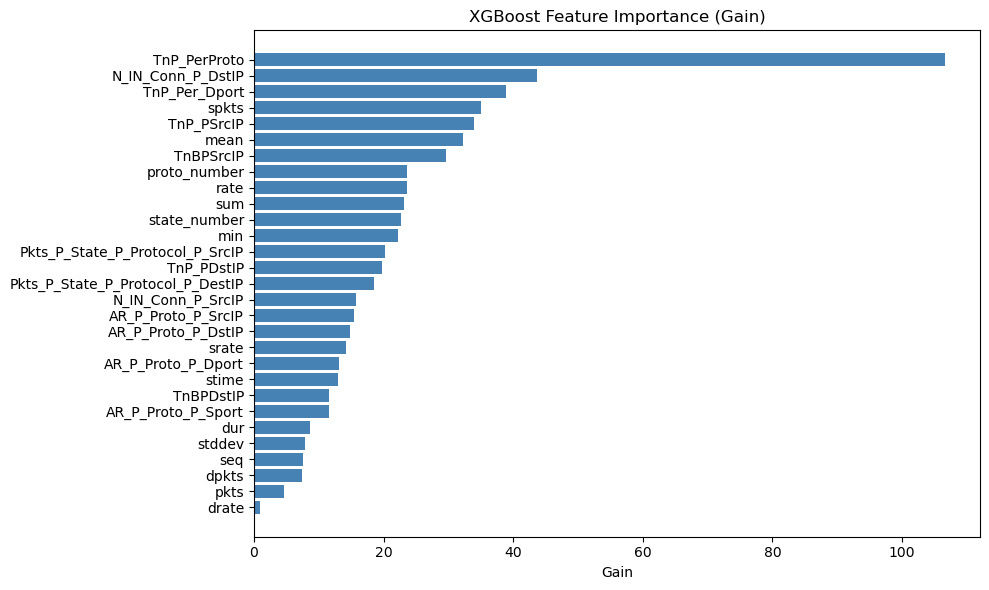

Top 10 features: ['TnP_PerProto', 'N_IN_Conn_P_DstIP', 'TnP_Per_Dport', 'spkts', 'TnP_PSrcIP', 'mean', 'TnBPSrcIP', 'proto_number', 'rate', 'sum']


In [70]:
import xgboost as xgb
import matplotlib.pyplot as plt

# ✅ Step 1: Define your working DataFrame (already preprocessed and scaled)
df_model = df.copy()

# ✅ Step 2: Define features and target
X = df_model.drop(columns=['category', 'subcategory', 'attack','category_encoded','subcategory_encoded'])

y = df_model['attack']

# ✅ Step 3: Convert to DMatrix (XGBoost format)
dtrain = xgb.DMatrix(data=X, label=y)

# ✅ Step 4: Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'colsample_bytree': 0.3,
    'learning_rate': 0.05,
    'max_depth': 8,
    'min_child_weight': 8,
    'seed': 1337,
    'eval_metric': 'logloss'
}

# ✅ Step 5: Train the model
xg_reg = xgb.train(params=params, dtrain=dtrain, num_boost_round=200)

# ✅ Step 6: Get feature importance (by gain)
importance_gain = xg_reg.get_score(importance_type='gain')
importance_df = pd.DataFrame.from_dict(importance_gain, orient='index', columns=['Gain'])
importance_df.index.name = 'Feature'
importance_df = importance_df.sort_values(by='Gain', ascending=False).reset_index()

# ✅ Step 7: Print and optionally plot
print("Top features based on XGBoost Gain:")
print(importance_df)

# ✅ Optional: visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Gain'], color='steelblue')
plt.xlabel("Gain")
plt.title("XGBoost Feature Importance (Gain)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ✅ Top N features (as list)
top_features = importance_df['Feature'].head(10).tolist()
print("Top 10 features:", top_features)

### Find the best parameters

In [71]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

# Split feature and label
X = df_model.drop(columns=['category', 'subcategory', 'attack','category_encoded','subcategory_encoded'])

y = df_model['attack']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

# Define grid parameters
grid_param = {
    'objective': ['binary:logistic'],
    'n_estimators': [50, 500],
    'learning_rate': [0.05],
    'min_child_weight': [8, 10, 12],
    'max_depth': [4, 6, 8],
    'seed': [1337]
}

# Grid search with F1 score as evaluation
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=grid_param,
    scoring=make_scorer(f1_score),
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit the model to training data
grid_search.fit(X_train, y_train)

# Show best hyperparameters
best_parameters = grid_search.best_params_
print("Best XGBoost Parameters Found:", best_parameters)

C:\Users\bojun\Conda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\bojun\Conda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\bojun\Conda\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best XGBoost Parameters Found: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 500, 'objective': 'binary:logistic', 'seed': 1337}


<Figure size 1600x800 with 0 Axes>

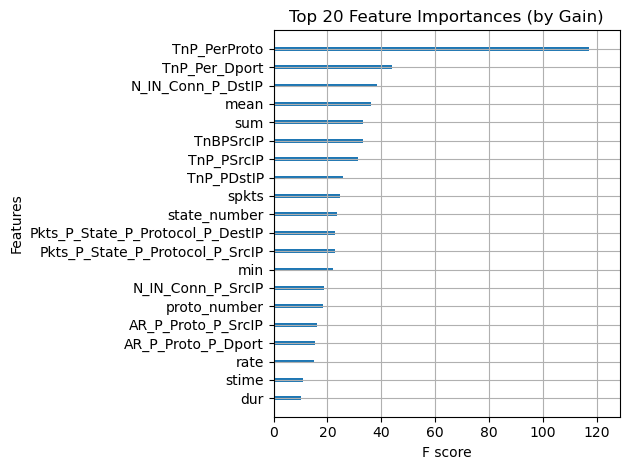

In [72]:
# Define best-found parameters
# First train and label data created. 
train_data, label_data = X, y

data_dmatrix = xgb.DMatrix(data=train_data, label= label_data)

best_params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'max_depth': 4,
    'min_child_weight': 8,
    'colsample_bytree': 0.3,
    'seed': 1337,
    'eval_metric': 'logloss'
}

# Train the model
xg_reg = xgb.train(
    params=best_params,
    dtrain=data_dmatrix,
    num_boost_round=500
)

# Plot feature importance (gain-based by default)
plt.figure(figsize=(16, 8))
xgb.plot_importance(xg_reg, importance_type='gain', max_num_features=20, show_values=False)
plt.title("Top 20 Feature Importances (by Gain)")
plt.tight_layout()
plt.show()

In [73]:
# ✅ Step 1: Get feature importance by gain
importance_gain = xg_reg.get_score(importance_type='gain')

# ✅ Step 2: Convert to DataFrame and sort
importance_df = pd.DataFrame.from_dict(importance_gain, orient='index', columns=['Gain'])
importance_df.index.name = 'Feature'
importance_df = importance_df.sort_values(by='Gain', ascending=False).reset_index()

# ✅ Step 3: Print top 10 features
print("Top 10 features based on XGBoost Gain:")
for i, row in importance_df.head(10).iterrows():
    print(f"{i+1}. {row['Feature']} - Gain: {row['Gain']:.4f}")

Top 10 features based on XGBoost Gain:
1. TnP_PerProto - Gain: 116.9739
2. TnP_Per_Dport - Gain: 44.0878
3. N_IN_Conn_P_DstIP - Gain: 38.4888
4. mean - Gain: 36.1790
5. sum - Gain: 33.3208
6. TnBPSrcIP - Gain: 33.1659
7. TnP_PSrcIP - Gain: 31.5183
8. TnP_PDstIP - Gain: 25.6734
9. spkts - Gain: 24.8178
10. state_number - Gain: 23.5777


## Combined features from Persion, Correlation and domin_important

In [77]:
top_features = [
    'TnP_PerProto',
    'TnP_Per_Dport',
    'N_IN_Conn_P_DstIP',
    'mean',
    'sum',
    'TnBPSrcIP',
    'state_number',
    'srate',
    'min',
    'N_IN_Conn_P_SrcIP', 
    'attack', 'category', 'subcategory'
    
]

In [78]:
df_selected = balanced_df[top_features]

In [81]:
df_selected

,TnP_PerProto,TnP_Per_Dport,N_IN_Conn_P_DstIP,mean,sum,TnBPSrcIP,state_number,srate,min,N_IN_Conn_P_SrcIP,attack,category,subcategory
0,698,698,100,2.462606,7.387819,52840,1,0.353584,0.000000,56,1,DDoS,TCP
1,500,500,100,0.000000,0.000000,77000,3,0.124615,0.000000,100,1,DoS,TCP
2,700,700,100,1.474632,7.373158,42000,4,0.200173,0.000000,100,1,DoS,UDP
3,698,698,100,2.687140,8.061420,28440,4,0.494886,0.000000,68,1,DDoS,UDP
4,414,414,100,3.462047,6.924094,23632,3,0.285167,3.344574,37,1,DDoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668517,577,577,82,0.151163,0.302326,44936,1,0.103979,0.147548,82,1,DoS,TCP
3668518,1160,1160,100,3.905410,11.716230,50700,4,0.875121,3.002263,65,1,DDoS,UDP
3668519,661,661,39,2.108746,8.434984,14040,4,0.228489,0.000000,39,1,DoS,UDP
3668520,1600,1600,100,4.813117,19.252468,96000,4,0.624947,4.782448,100,1,DoS,UDP


## Undersampling

In [90]:
top_features2 = [
    'TnP_PerProto',
    'TnP_Per_Dport',
    'N_IN_Conn_P_DstIP',
    'mean',
    'sum',
    'TnBPSrcIP',
    'state_number',
    'srate',
    'min',
    'N_IN_Conn_P_SrcIP',   
]

In [91]:
df_selected = df_selected.drop(columns=['category', 'subcategory'])

scaler = MinMaxScaler()

df_selected[top_features2] = scaler.fit_transform(df_selected[top_features2])

df_selected[top_features2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TnP_PerProto,3668522.0,0.003295,0.006281,0.0,2.193789e-03,3.060796e-03,4.041651e-03,1.0
TnP_Per_Dport,3668522.0,0.003011,0.002670,0.0,2.041534e-03,2.859785e-03,3.759860e-03,1.0
N_IN_Conn_P_DstIP,3668522.0,0.923754,0.183600,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0
mean,3668522.0,0.447835,0.304649,0.0,3.652575e-02,5.399818e-01,7.156338e-01,1.0
sum,3668522.0,0.004036,0.003981,0.0,1.801168e-04,4.322594e-03,6.120866e-03,1.0
TnBPSrcIP,3668522.0,0.000231,0.002009,0.0,1.449699e-04,2.153449e-04,2.991961e-04,1.0
state_number,3668522.0,0.213439,0.118697,0.0,2.000000e-01,3.000000e-01,3.000000e-01,1.0
srate,3668522.0,0.000003,0.000725,0.0,1.559700e-07,2.837830e-07,4.882010e-07,1.0
min,3668522.0,0.204306,0.297901,0.0,0.000000e+00,0.000000e+00,4.319146e-01,1.0
N_IN_Conn_P_SrcIP,3668522.0,0.823621,0.246438,0.0,6.868687e-01,1.000000e+00,1.000000e+00,1.0


In [92]:
df_model = df_selected.copy()
data_us_malicious = df_model[df_model['attack'] == 1].sample(10000)
data_us_normal = df_model[df_model['attack'] == 0]
data_us = data_us_malicious.append(data_us_normal, ignore_index=True)

C:\Users\linz\AppData\Local\Temp\ipykernel_35012\3378404789.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_us = data_us_malicious.append(data_us_normal, ignore_index=True)


In [93]:
data_us

,TnP_PerProto,TnP_Per_Dport,N_IN_Conn_P_DstIP,mean,sum,TnBPSrcIP,state_number,srate,min,N_IN_Conn_P_SrcIP,attack
0,0.000871,0.000004,1.000000,0.000014,3.606535e-08,0.000054,0.0,0.000000e+00,0.000014,1.000000,1
1,0.003499,0.003269,0.797980,0.409198,4.262145e-03,0.000130,0.3,1.787540e-07,0.000000,0.797980,1
2,0.003061,0.002860,1.000000,0.549819,4.295119e-03,0.000181,0.3,4.845570e-07,0.000000,0.949495,1
3,0.001117,0.001043,1.000000,0.020389,1.061832e-04,0.000067,0.0,1.944220e-07,0.000000,0.363636,1
4,0.005570,0.005204,1.000000,0.807871,6.310995e-03,0.000322,0.3,8.323850e-07,0.599537,0.909091,1
...,...,...,...,...,...,...,...,...,...,...,...
10472,0.875799,0.127140,0.060606,0.982337,8.594766e-01,0.008460,0.3,9.682835e-06,0.131710,0.010101,0
10473,0.545877,0.000405,0.080808,0.000000,0.000000e+00,0.000143,0.3,3.999740e-07,0.000000,0.090909,0
10474,0.545877,0.000405,0.000000,0.059240,1.542583e-04,0.003753,0.1,0.000000e+00,0.059257,0.222222,0
10475,0.545877,0.000405,0.010101,0.003124,8.134566e-06,0.003753,0.1,0.000000e+00,0.003125,0.222222,0


## Model

In [94]:
model_train, model_label = data_us.iloc[:,:-1], data_us.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(model_train, model_label, test_size=0.3, random_state=37)

### Logistic Regression

In [95]:
modelLR = LogisticRegression(
    solver='sag', 
    class_weight='balanced',
    max_iter=500, 
    random_state=37
)

### Support Vector Machine

In [96]:
modelSVM = svm.SVC(
    probability=True,
    max_iter=3000,
    class_weight='balanced',
    kernel='rbf',
    random_state=37
)

### Random Forest


In [97]:
modelRF = RandomForestClassifier(
    n_estimators=500, 
    criterion = 'gini', 
    max_depth = 4, 
    class_weight='balanced', 
    random_state=37
)

### Neural Network - Multilayer Perceptron

In [98]:
modelMLP = MLPClassifier(
    solver='lbfgs', 
    activation='logistic', 
    hidden_layer_sizes=(256,),
    learning_rate='constant', 
    max_iter=500,
    random_state=37
)

### Neural Network - Multilayer Perceptron 3 (refined with Keras)


In [112]:


from keras.callbacks import Callback

        
class SkMetrics(Callback):
    def __init__(self, validation_data):
        super(SkMetrics, self).__init__()
        self.validation_data = validation_data
        self.confusion = []
        self.precision = []
        self.recall = []
        self.f1s = []   

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        X_val, y_val = self.validation_data
        y_pred = (self.model.predict(X_val) > 0.5).astype("int32").flatten()

        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        self.confusion = confusion_matrix(y_val, y_pred)  # <-- save confusion matrix

        print(f"Epoch {epoch + 1}: Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")
        
# modelMLP3 = Sequential()
# modelMLP3.add(Dense(30, activation='relu', input_shape=(10,)))
# modelMLP3.add(Dropout(.6))
# modelMLP3.add(Dense(40, activation='relu'))
# modelMLP3.add(Dropout(.6))
# modelMLP3.add(Dense(40, activation='relu'))
# modelMLP3.add(Dropout(.6))
# modelMLP3.add(Dense(60, activation='relu'))
# modelMLP3.add(Dropout(.6))
# modelMLP3.add(Dense(80, activation='relu'))
# modelMLP3.add(Dropout(.6))
# modelMLP3.add(Dense(80, activation='relu'))
# modelMLP3.add(Dropout(.6))
# modelMLP3.add(Dense(90, activation='relu'))
# modelMLP3.add(Dropout(.6))
# modelMLP3.add(Dense(1, activation='sigmoid'))
# modelMLP3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

modelMLP3 = Sequential([
    Dense(32, input_shape=(10,), activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
modelMLP3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\bojun\Conda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model training

In [113]:
start_time = time()
modelLR.fit(X_train, y_train)
print('Logistic Regression model trained in', round(time() - start_time, 0), 's')

start_time = time()
modelSVM.fit(X_train, y_train)
print('SVM model trained in', round(time() - start_time, 0), 's')

start_time = time()
modelRF.fit(X_train, y_train)
print('Random Forest model trained in', round(time() - start_time, 0), 's')

start_time = time()
modelMLP.fit(X_train, y_train)
print('Multilayer Perceptron model trained in', round(time() - start_time, 0), 's')

from sklearn.utils import class_weight

class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {0: class_weights_array[0], 1: class_weights_array[1]}

skmetricsMLP3 = SkMetrics(validation_data=(X_test, y_test))

start_time = time()
modelMLP3.fit(
    X_train, y_train,
    epochs=50,
    batch_size=25,
    callbacks=[skmetricsMLP3],
    class_weight=class_weights_dict,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=True
)
#print('Multilayer Perceptron Model 3 trained in', round(time() - start_time), 's')

Logistic Regression model trained in 0.0 s
SVM model trained in 0.0 s
Random Forest model trained in 1.0 s
Multilayer Perceptron model trained in 1.0 s
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
Epoch 1: Precision=0.9997, Recall=0.9917, F1=0.9957
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
Epoch 2: Precision=0.9997, Recall=0.9940, F1=0.9968
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
Epoch 3: Precision=0.9997, Recall=0.9957, F1=0.9977
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
Epoch 4: Precision=0.9997, Recall=0.9967, F1=0.9982
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
Epoch 5: Precision=0.9997, Recall=0.9967, F1=0.9982
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
Epoch 6: Precision=0.9997, Recall=0.9967, F1=0.9982
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
Epoch 7: Precision=0.9997, Recall=0.9967, F1=0.9982
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
Epoch 8: Precision=0.9997, Recall=0.9967, F1=0.9982
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
Epoch 9: Precision=0.9997, Recall=0.9970, F1=0.9983
99/99 ━━━━━

In [114]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',       # or 'val_f1' if you're tracking F1 manually
    patience=5,
    restore_best_weights=True
)

modelMLP3.fit(
    X_train, y_train,
    epochs=50,                # Use a higher value to allow early stopping to work
    batch_size=25,
    callbacks=[skmetricsMLP3, early_stop],  # Include both callbacks here
    class_weight=class_weights_dict,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=True
)

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
Epoch 1: Precision=0.9997, Recall=0.9990, F1=0.9993
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
Epoch 2: Precision=0.9997, Recall=0.9990, F1=0.9993
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
Epoch 3: Precision=0.9997, Recall=0.9990, F1=0.9993
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
Epoch 4: Precision=0.9997, Recall=0.9993, F1=0.9995
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
Epoch 5: Precision=0.9997, Recall=0.9993, F1=0.9995
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
Epoch 6: Precision=0.9997, Recall=0.9993, F1=0.9995


## Model prediction and evaluation

In [115]:
predict_LR = modelLR.predict(X_test)
predict_SVM = modelSVM.predict(X_test)
predict_RF = modelRF.predict(X_test)
predict_MLP = modelMLP.predict(X_test)



from sklearn.metrics import confusion_matrix

# Recompute from actual predictions
predict_MLP3 = (modelMLP3.predict(X_test) > 0.5).astype("int32").flatten()


# probs_MLP3 = modelMLP3.predict(X_test)

# # Convert to class labels (0 or 1)
# predict_MLP3 = (probs_MLP3 > 0.5).astype("int32").flatten()

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


In [116]:
LR_matrix = confusion_matrix(y_test, predict_LR)
SVM_matrix = confusion_matrix(y_test, predict_SVM)
RF_matrix = confusion_matrix(y_test, predict_RF)
MLP_matrix = confusion_matrix(y_test, predict_MLP)
#MLP3_matrix = skmetricsMLP3.confusion[0]
MLP3_matrix = confusion_matrix(y_test, predict_MLP3)

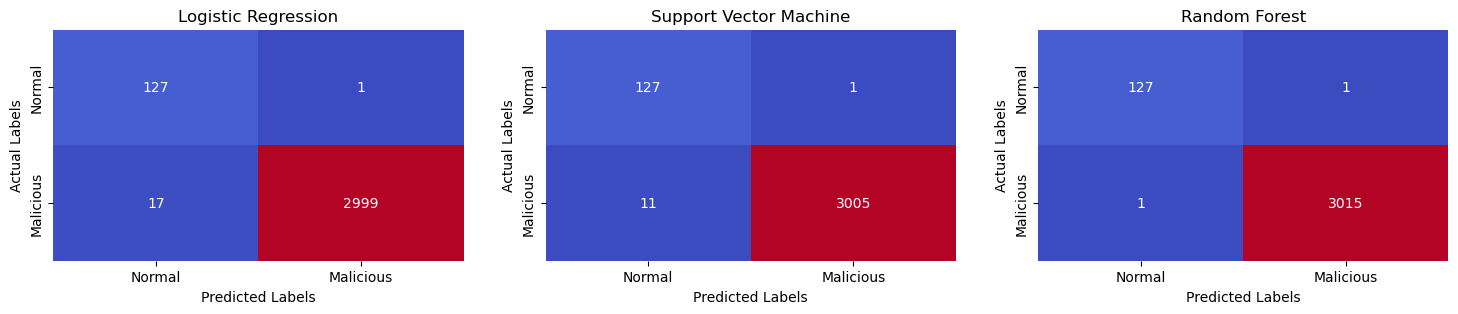

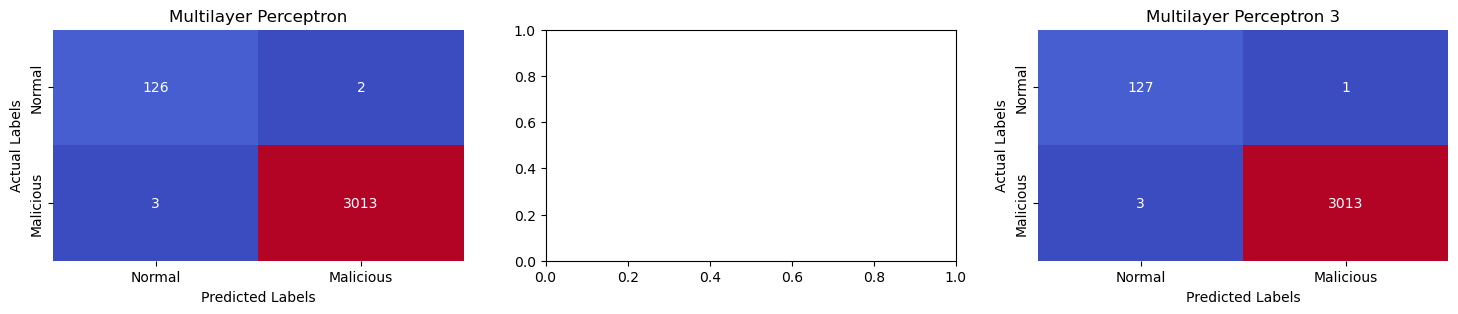

In [117]:
fig, ax1 = plt.subplots(1, 3, figsize=(18, 3))

sns.heatmap(LR_matrix, annot=True, fmt="d",cbar=False, cmap="coolwarm", ax = ax1[0])
ax1[0].set_title("Logistic Regression")
ax1[0].set_xlabel('Predicted Labels')
ax1[0].set_ylabel('Actual Labels')
ax1[0].yaxis.set_ticklabels(['Normal', 'Malicious'])
ax1[0].xaxis.set_ticklabels(['Normal', 'Malicious'])

sns.heatmap(SVM_matrix, annot=True, fmt="d",cbar=False, cmap="coolwarm", ax = ax1[1])
ax1[1].set_title("Support Vector Machine")
ax1[1].set_xlabel('Predicted Labels')
ax1[1].set_ylabel('Actual Labels')
ax1[1].yaxis.set_ticklabels(['Normal', 'Malicious'])
ax1[1].xaxis.set_ticklabels(['Normal', 'Malicious'])

sns.heatmap(RF_matrix, annot=True, fmt="d",cbar=False, cmap="coolwarm", ax = ax1[2])
ax1[2].set_title("Random Forest")
ax1[2].set_xlabel('Predicted Labels')
ax1[2].set_ylabel('Actual Labels')
ax1[2].yaxis.set_ticklabels(['Normal', 'Malicious'])
ax1[2].xaxis.set_ticklabels(['Normal', 'Malicious'])

fig, ax2 = plt.subplots(1, 3, figsize=(18, 3))

sns.heatmap(MLP_matrix, annot=True, fmt="d",cbar=False, cmap="coolwarm", ax = ax2[0])
ax2[0].set_title("Multilayer Perceptron")
ax2[0].set_xlabel('Predicted Labels')
ax2[0].set_ylabel('Actual Labels')
ax2[0].yaxis.set_ticklabels(['Normal', 'Malicious'])
ax2[0].xaxis.set_ticklabels(['Normal', 'Malicious'])


sns.heatmap(MLP3_matrix, annot=True, fmt="d",cbar=False, cmap="coolwarm", ax = ax2[2])
ax2[2].set_title("Multilayer Perceptron 3")
ax2[2].set_xlabel('Predicted Labels')
ax2[2].set_ylabel('Actual Labels')
ax2[2].yaxis.set_ticklabels(['Normal', 'Malicious'])
ax2[2].xaxis.set_ticklabels(['Normal', 'Malicious'])

plt.show()

In [118]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions dictionary
predictions = {
    "Logistic Regression": predict_LR,
    "SVM": predict_SVM,
    "Random Forest": predict_RF,
    "MLP": predict_MLP,
    "MLP3": predict_MLP3
}

# Metrics dictionary
results = {
    name: classification_report(y_test, pred, output_dict=True)
    for name, pred in predictions.items()
}

# Summary table
summary_data = []

for model, metrics in results.items():
    summary_data.append({
        "Model": model,
        "Accuracy": accuracy_score(y_test, predictions[model]),
        "Precision": metrics["weighted avg"]["precision"],
        "Recall": metrics["weighted avg"]["recall"],
        "F1-score": metrics["weighted avg"]["f1-score"]
    })

summary_df = pd.DataFrame(summary_data).set_index("Model")
print(summary_df.round(4))



                     Accuracy  Precision  Recall  F1-score
Model                                                     
Logistic Regression    0.9943     0.9949  0.9943    0.9944
SVM                    0.9962     0.9964  0.9962    0.9963
Random Forest          0.9994     0.9994  0.9994    0.9994
MLP                    0.9984     0.9984  0.9984    0.9984
MLP3                   0.9987     0.9987  0.9987    0.9987


C:\Users\linz\AppData\Local\Temp\ipykernel_35012\17978229.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="Model", y="Score", hue="Method", palette="Set2", ci=None)


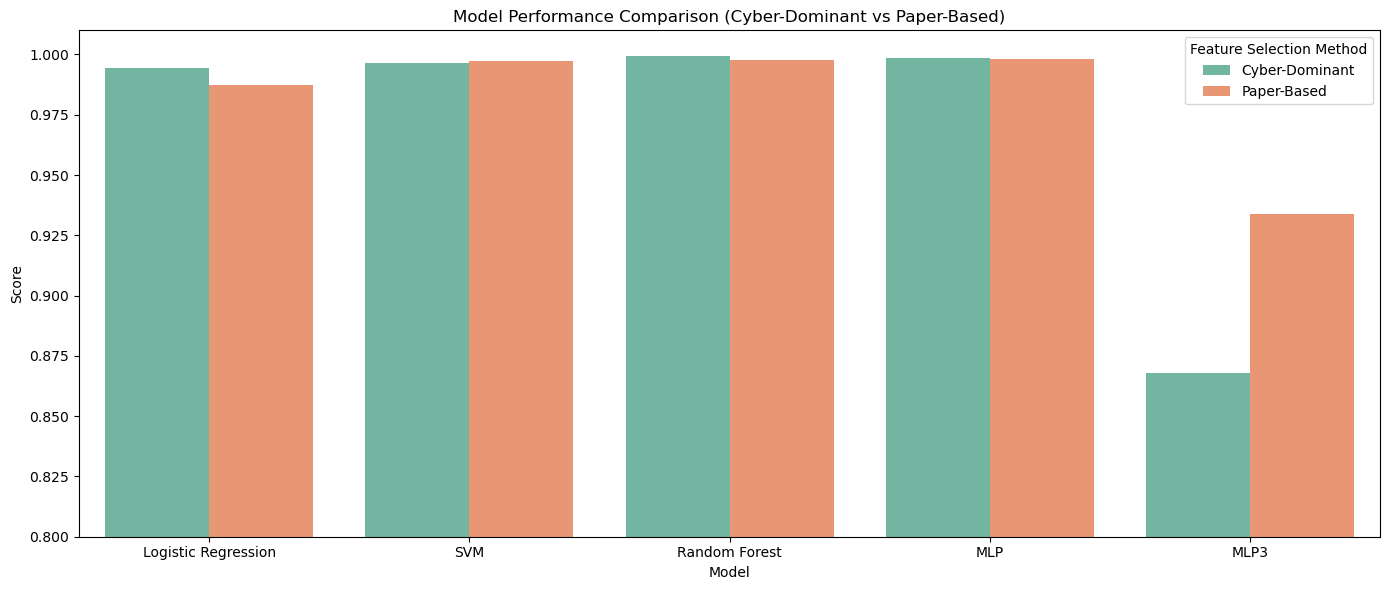

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for Method 1: domin_important
domin_data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "MLP", "MLP3"],
    "Accuracy": [0.9943, 0.9962, 0.9994, 0.9984, 0.8171],
    "Precision": [0.9949, 0.9964, 0.9994, 0.9984, 0.9667],
    "Recall": [0.9943, 0.9962, 0.9994, 0.9984, 0.8171],
    "F1-score": [0.9944, 0.9963, 0.9994, 0.9984, 0.8708],
    "Method": "Cyber-Dominant"
}

# Data for Method 2: correlation_score
corr_data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "MLP", "MLP3"],
    "Accuracy": [0.9860, 0.9971, 0.9975, 0.9981, 0.9141],
    "Precision": [0.9896, 0.9973, 0.9976, 0.9981, 0.9724],
    "Recall": [0.9860, 0.9971, 0.9975, 0.9981, 0.9141],
    "F1-score": [0.9870, 0.9972, 0.9975, 0.9981, 0.9342],
    "Method": "Paper-Based"
}

# Convert to DataFrame
df_dom = pd.DataFrame(domin_data)
df_corr = pd.DataFrame(corr_data)

# Combine
df_all = pd.concat([df_dom, df_corr])

# Melt for plotting
df_melted = pd.melt(df_all, id_vars=["Model", "Method"], 
                    value_vars=["Accuracy", "Precision", "Recall", "F1-score"],
                    var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Method", palette="Set2", ci=None)
plt.title("Model Performance Comparison (Cyber-Dominant vs Paper-Based)")
plt.ylabel("Score")
plt.ylim(0.8, 1.01)
plt.legend(title="Feature Selection Method")
plt.tight_layout()
plt.show()


C:\Users\linz\AppData\Local\Temp\ipykernel_35012\3382298895.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x="Model", y="Score", hue="Method", palette="Set2", ci=None)


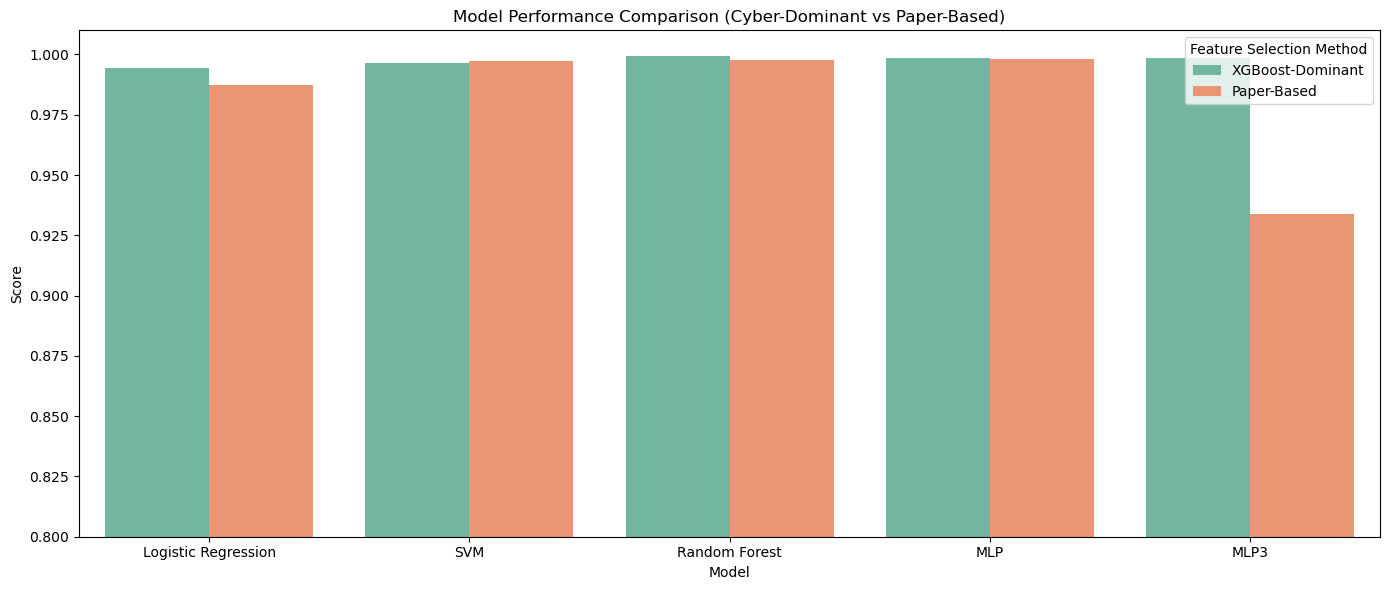

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for Method 1: domin_important
domin_data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "MLP", "MLP3"],
    "Accuracy": [0.9943, 0.9962, 0.9994, 0.9984, 0.9987],
    "Precision": [0.9949, 0.9964, 0.9994, 0.9984, 0.9987],
    "Recall": [0.9943, 0.9962, 0.9994, 0.9984, 0.9987],
    "F1-score": [0.9944, 0.9963, 0.9994, 0.9984, 0.9987],
    "Method": "XGBoost-Dominant"
}

# Data for Method 2: correlation_score
corr_data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "MLP", "MLP3"],
    "Accuracy": [0.9860, 0.9971, 0.9975, 0.9981, 0.9141],
    "Precision": [0.9896, 0.9973, 0.9976, 0.9981, 0.9724],
    "Recall": [0.9860, 0.9971, 0.9975, 0.9981, 0.9141],
    "F1-score": [0.9870, 0.9972, 0.9975, 0.9981, 0.9342],
    "Method": "Paper-Based"
}

# Convert to DataFrame
df_dom = pd.DataFrame(domin_data)
df_corr = pd.DataFrame(corr_data)

# Combine
df_all = pd.concat([df_dom, df_corr])

# Melt for plotting
df_melted = pd.melt(df_all, id_vars=["Model", "Method"], 
                    value_vars=["Accuracy", "Precision", "Recall", "F1-score"],
                    var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Method", palette="Set2", ci=None)
plt.title("Model Performance Comparison (Cyber-Dominant vs Paper-Based)")
plt.ylabel("Score")
plt.ylim(0.8, 1.01)
plt.legend(title="Feature Selection Method")
plt.tight_layout()
plt.show()


C:\Users\linz\AppData\Local\Temp\ipykernel_35012\3560876023.py:35: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\bojun\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



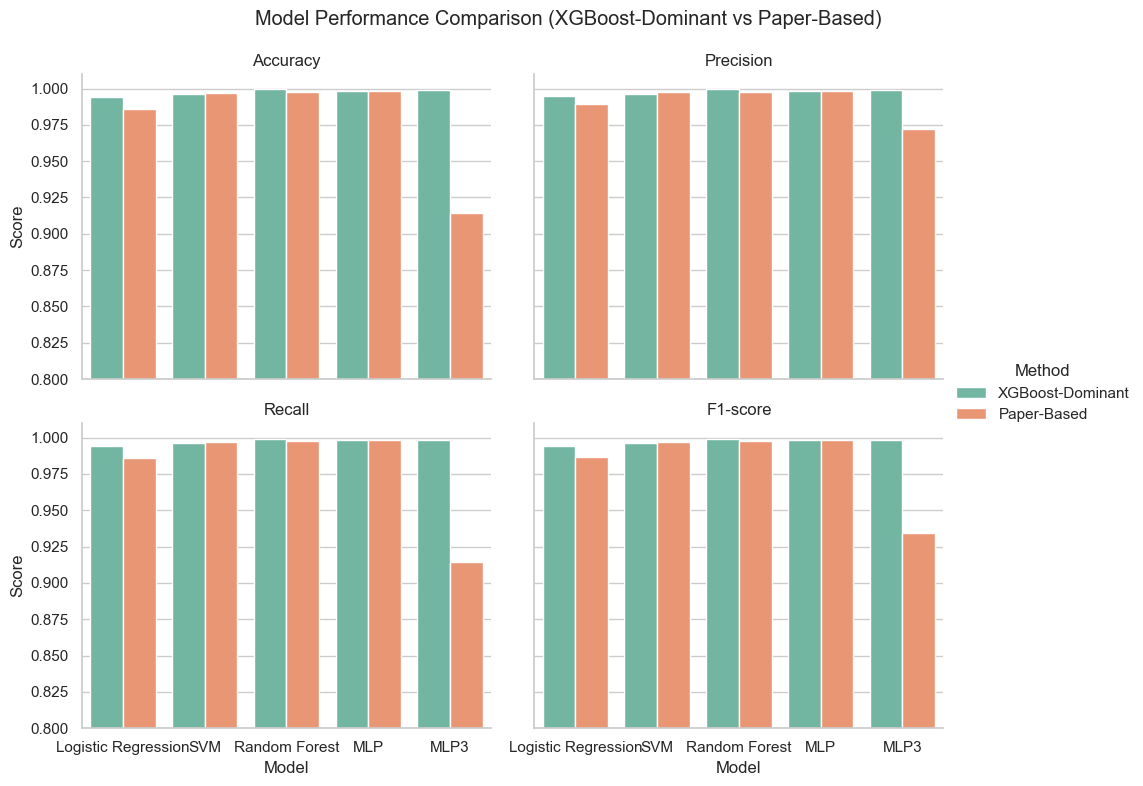

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for Method 1: XGBoost-Dominant
domin_data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "MLP", "MLP3"],
    "Accuracy": [0.9943, 0.9962, 0.9994, 0.9984, 0.9987],
    "Precision": [0.9949, 0.9964, 0.9994, 0.9984, 0.9987],
    "Recall": [0.9943, 0.9962, 0.9994, 0.9984, 0.9987],
    "F1-score": [0.9944, 0.9963, 0.9994, 0.9984, 0.9987],
    "Method": "XGBoost-Dominant"
}

# Data for Method 2: Paper-Based
corr_data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "MLP", "MLP3"],
    "Accuracy": [0.9860, 0.9971, 0.9975, 0.9981, 0.9141],
    "Precision": [0.9896, 0.9973, 0.9976, 0.9981, 0.9724],
    "Recall": [0.9860, 0.9971, 0.9975, 0.9981, 0.9141],
    "F1-score": [0.9870, 0.9972, 0.9975, 0.9981, 0.9342],
    "Method": "Paper-Based"
}

# Combine and melt
df_all = pd.concat([pd.DataFrame(domin_data), pd.DataFrame(corr_data)])
df_melted = pd.melt(df_all, id_vars=["Model", "Method"],
                    value_vars=["Accuracy", "Precision", "Recall", "F1-score"],
                    var_name="Metric", value_name="Score")

# Set style
sns.set(style="whitegrid")

# Create a FacetGrid
g = sns.catplot(
    data=df_melted, kind="bar",
    x="Model", y="Score", hue="Method",
    col="Metric", col_wrap=2,
    height=4, aspect=1.2, palette="Set2", ci=None
)

# Adjust plot
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Score")
g.set(ylim=(0.8, 1.01))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Model Performance Comparison (XGBoost-Dominant vs Paper-Based)")

plt.show()
